In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt'
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt'
path = './data/line_3/'
file = 'F_1_L23.I_T5202F02_2'
fileb = 'F_1_L23.I_T5202F02_2S01'
filec = 'F_1_L23.I_T5202F02_2I'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('data/line_3'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [3]:
l = loadData(path,file)

./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/


In [4]:
data_l = pd.DataFrame(l)

In [5]:
z_v = loadData(path,fileb)

./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/


In [6]:
z_i = loadData(path,filec)

./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/
./data/line_3/


In [7]:
data_z_v = pd.DataFrame(z_v)
data_z_i = pd.DataFrame(z_i)

In [8]:
data_z_v.head()

,quality,ts,value
0,优,2018-04-14 08:00:00.766,1822.331299
1,优,2018-04-14 08:00:03.256,1900.280762
2,优,2018-04-14 08:00:05.784,1887.113647
3,优,2018-04-14 08:00:08.325,1880.530029
4,优,2018-04-14 08:00:10.812,1852.352417


In [9]:
data_z_i.head()

,quality,ts,value
0,优,2018-04-14 08:00:02.013,94.487350
1,优,2018-04-14 08:00:04.520,92.380608
2,优,2018-04-14 08:00:07.046,91.924149
3,优,2018-04-14 08:00:09.563,92.296341
4,优,2018-04-14 08:00:12.070,93.876396


In [10]:
data_l.value = pd.to_numeric(data_l.value, errors='ignore')
data_z_v.value = pd.to_numeric(data_z_v.value,errors = 'ignore')
data_z_i.value = pd.to_numeric(data_z_i.value,errors = 'ignore')

data_l = data_l[data_l['value']> 0]
data_z_i = data_z_i[data_z_i['value'] > 0]
data_z_v = data_z_v[data_z_v['value'] > 0] 

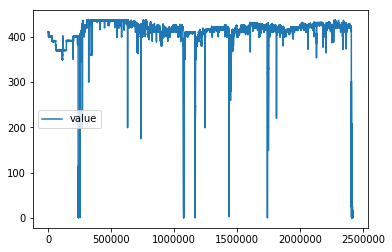

In [16]:
data_l.plot()

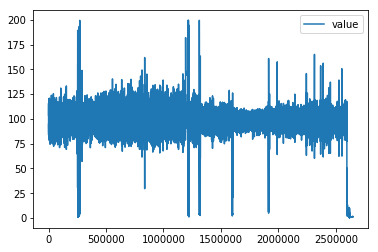

In [17]:
data_z_i.plot()

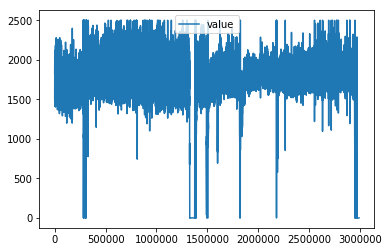

In [18]:
data_z_v.plot()

In [11]:
new_ts_l = [data_l['ts'].iloc[i][0:13] for i in range(0,len(data_l))]
new_ts_z_v = [data_z_v['ts'].iloc[i][0:13] for i in range(0,len(data_z_v))]
new_ts_z_i = [data_z_i['ts'].iloc[i][0:13] for i in range(0,len(data_z_i))]

In [12]:
data_l.drop('ts',axis=1, inplace=True)
data_z_i.drop('ts',axis=1, inplace=True)
data_z_v.drop('ts',axis=1, inplace=True)

In [13]:
data_l.insert(1,'ts',new_ts_l)
data_z_v.insert(1,'ts',new_ts_z_v)
data_z_i.insert(1,'ts',new_ts_z_i)

In [14]:
grouped_l = data_l['value'].groupby(data_l['ts'])
grouped_z_v = data_z_v['value'].groupby(data_z_v['ts'])
grouped_z_i = data_z_i['value'].groupby(data_z_i['ts']) 

In [15]:
d1 = grouped_l.mean()
d2 = grouped_z_v.mean()
d3 = grouped_z_i.mean()

In [16]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)

In [17]:
data_2_3 = pd.merge(d2,d3,left_index= True, right_index=True)

In [18]:
data_all =  pd.merge(d1,data_2_3,left_index= True, right_index=True)

In [19]:
data_all

,value,value_x,value_y
ts,,,
2018-04-14 08,410.209815,1745.531513,99.720408
2018-04-14 09,406.182978,1727.005021,99.821289
2018-04-14 10,400.168418,1702.118339,99.829918
2018-04-14 11,400.177397,1701.470879,99.730133
2018-04-14 12,400.187163,1703.327655,99.766087
2018-04-14 13,400.184573,1700.783321,99.863487
2018-04-14 14,400.182491,1702.173700,99.763345
2018-04-14 15,400.187242,1701.961003,99.756831
2018-04-14 16,400.196925,1700.717764,99.884635


In [20]:
mul = data_all.value_x * data_all.value_y
mul = pd.DataFrame(mul)

In [21]:
data_all.insert(1,'multiply',mul)

In [22]:
data_all['multiply']

ts
2018-04-14 08    174065.115034
2018-04-14 09    172391.868088
2018-04-14 10    169922.333714
2018-04-14 11    169687.916218
2018-04-14 12    169934.334525
2018-04-14 13    169846.153227
2018-04-14 14    169814.541675
2018-04-14 15    169782.236103
2018-04-14 16    169875.572533
2018-04-14 17    169767.870442
2018-04-14 18    169840.391255
2018-04-14 19    169857.358395
2018-04-14 20    169845.938511
2018-04-14 21    169941.501774
2018-04-14 22    169955.694263
2018-04-14 23    170003.607738
2018-04-15 00    169995.108749
2018-04-15 01    169960.446809
2018-04-15 02    169790.078770
2018-04-15 03    170004.664382
2018-04-15 04    169837.164044
2018-04-15 05    169789.806527
2018-04-15 06    169958.656204
2018-04-15 07    170075.040093
2018-04-15 08    169833.059418
2018-04-15 09    165834.983039
2018-04-15 10    165607.397134
2018-04-15 11    165593.546594
2018-04-15 12    165468.863643
2018-04-15 13    165636.223564
                     ...      
2018-07-08 15    178718.269004
2018-

Text(0, 0.5, 'F_1_L23.I_T5202F02_2_mean_value')

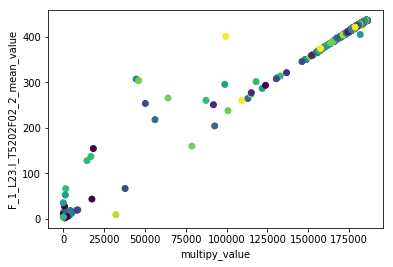

In [23]:
#流量与转速 * 负荷反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['multiply'],data_all['value'],c = c,marker = 'o')
plt.xlabel('multipy_value')
plt.ylabel('F_1_L23.I_T5202F02_2_mean_value')

Text(0, 0.5, 'F_1_L23.I_T5202F02_2_mean_value')

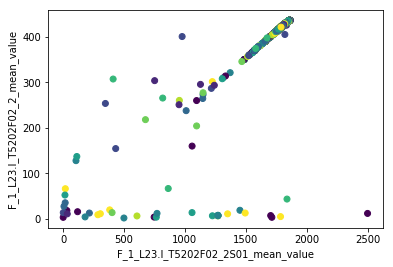

In [34]:
#流量与转速结果反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_x'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2S01_mean_value')
plt.ylabel('F_1_L23.I_T5202F02_2_mean_value')

Text(0, 0.5, 'F_1_L23.I_T5202F02_2_mean_value')

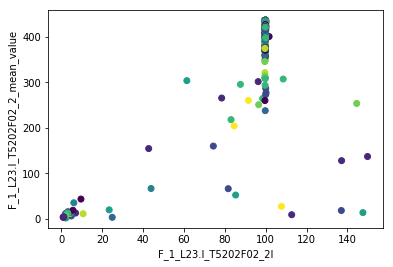

In [33]:
#流量和负荷的反馈
import numpy as np
c=np.random.randint(0,10,len(data_all))
plt.scatter(data_all['value_y'],data_all['value'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2I')
plt.ylabel('F_1_L23.I_T5202F02_2_mean_value')